In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("ratings.txt", delimiter = '\t')
data = data.drop(columns = 'id')
data.head()

,document,label
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  199992 non-null  object
 1   label     200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [3]:
data.label.value_counts()

1    100000
0    100000
Name: label, dtype: int64

In [4]:
df1 = pd.read_csv("0112.csv", encoding="utf-8")
df2 = pd.read_csv("0113.csv", encoding="utf-8")
df3 = pd.read_csv("0114.csv", encoding="utf-8")
df4 = pd.read_csv("0115.csv", encoding="utf-8")
df5 = pd.read_csv("0116.csv", encoding="utf-8")
df6 = pd.read_csv("0117.csv", encoding="utf-8")
df7 = pd.read_csv("0118.csv", encoding="utf-8")
df8 = pd.read_csv("0119.csv", encoding="utf-8")
df9 = pd.read_csv("0120.csv", encoding="utf-8")
df10 = pd.read_csv("0121.csv", encoding="utf-8")
df11 = pd.read_csv("0122.csv", encoding="utf-8")
df12 = pd.read_csv("0123.csv", encoding="utf-8")
df13 = pd.read_csv("0124.csv", encoding="utf-8")
df14 = pd.read_csv("0125.csv", encoding="utf-8")
df15 = pd.read_csv("0126.csv", encoding="utf-8")
df16 = pd.read_csv("0127.csv", encoding="utf-8")
df17 = pd.read_csv("0128.csv", encoding="utf-8")
df18 = pd.read_csv("0129.csv", encoding="utf-8")
df19 = pd.read_csv("0130.csv", encoding="utf-8")
df20 = pd.read_csv("0131.csv", encoding="utf-8")

In [6]:
data2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20], axis=0, ignore_index = True)
data2 = data2.rename(columns = {'sentence':'document'})

def rating_to_label(score):
    if score >= 8:
        return 1
    if score <= 5:
        return 0
    
data2['label'] = data2['score'].apply(lambda x: rating_to_label(x))
data2 = data2.drop(columns = 'score')
data2 = data2.dropna(axis = 0)

In [7]:
data2.set_index('document',inplace=True)
data2 = data2.astype('int')
data2.reset_index(inplace=True)
data2.head()

,document,label
0,"연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움",1
1,큐브가 훨씬 재미있었던 것 같다,0
2,나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...,1
3,넷플로시청하기에 10점~배우분들 매력 최고,1
4,이걸 영화라고....,0


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50889 entries, 0 to 50888
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  50889 non-null  object
 1   label     50889 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 596.5+ KB


In [11]:
data2.label.value_counts()

1    39047
0    11842
Name: label, dtype: int64

In [43]:
df = pd.concat([data2, data], axis=0, ignore_index = True)
df.shape

(250889, 2)

# 데이터 전처리

In [45]:
df.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df['document'] = df['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
df['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df = df.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df))

C:\Users\user\AppData\Local\Temp\ipykernel_6428\1520741230.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
C:\Users\user\AppData\Local\Temp\ipykernel_6428\1520741230.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


전처리 후 테스트용 샘플의 개수 : 243280


In [46]:
df["label"].value_counts()

1    134705
0    108575
Name: label, dtype: int64

In [50]:
df = pd.concat([df[df['label']==0].head(100000),df[df['label']==1].head(100000)], axis=0, ignore_index = True)
df.head()

,document,label
0,큐브가 훨씬 재미있었던 것 같다,0
1,이걸 영화라고,0
2,절대 보지 마세요완전 지루하고 노잼입니다평점이 도저히 이해가 안갑니다돈이 너무 아깝...,0
3,그렇게 하고싶냐,0
4,연필로 복지란 글자를 힘껏 쓰다 심이 부러짐,0


In [51]:
df["label"].value_counts()

0    100000
1    100000
Name: label, dtype: int64

<AxesSubplot:>

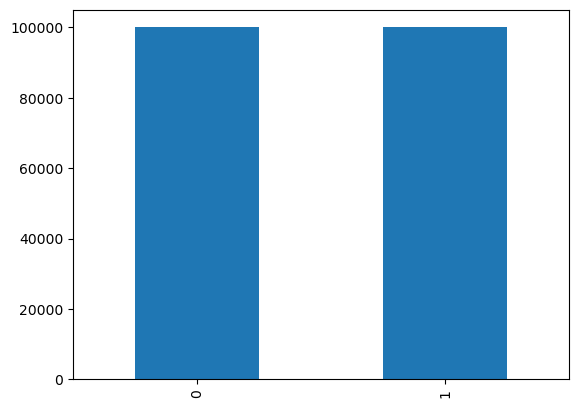

In [52]:
df['label'].value_counts().sort_index(ascending=True).plot(kind='bar')

## 학습용 데이터 가공

In [68]:
import re
import konlpy

In [69]:
# 텍스트를 tokenize해서 adjective, verb, noun만 추출하는 함수
def tokenize_korean_text(text): 
  text_filtered = re.sub('[^,.?!\w\s]','', text)

  okt = konlpy.tag.Okt() 
  Okt_morphs = okt.pos(text_filtered) 

  words = []
  for word, pos in Okt_morphs:
    if pos == 'Adjective' or pos == 'Verb' or pos == 'Noun':
      words.append(word)

  words_str = ' '.join(words)
  return words_str

In [72]:
X_texts = []
y = df['label']

for document in df['document']:

    tokenized_comment = tokenize_korean_text(document)
    X_texts.append(tokenized_comment)

print(f'원래 text 수: {len(df)}')
print(f'평점 5 이하 혹은 8 이상인 text 수: {len(X_texts)}')    
print(X_texts[:5])

원래 text 수: 200000
평점 5 이하 혹은 8 이상인 text 수: 200000
['큐브 재미있었던 것 같다', '걸 영화', '절대 보지 마세요 완전 지루하고 노잼 입니다 평점 도저히 이해 갑니다 돈 아깝습니다', '하고싶냐', '연필 복지 란 글자 힘껏 쓰다 심 부러짐']


## Logistic Regression 학습

In [74]:
from sklearn.model_selection import train_test_split
X_train_texts, X_test_texts, y_train, y_test = train_test_split(X_texts, y, test_size=0.2, random_state=0)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer로 vector화
tf_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
X_train_tf = tf_vectorizer.fit_transform(X_train_texts)  # training data에 맞게 fit & training data를 transform
X_test_tf = tf_vectorizer.transform(X_test_texts) # test data를 transform

vocablist = [word for word, number in sorted(tf_vectorizer.vocabulary_.items(), key=lambda x:x[1])]  # 단어들을 번호 기준 내림차순으로 저장

In [77]:
## 확인해보기
print(X_train_tf[:1], '\n')
print(X_test_tf[:1], '\n')
print(vocablist[:3])

  (0, 29625)	1
  (0, 81831)	1
  (0, 73289)	1
  (0, 66535)	1
  (0, 52874)	1 

  (0, 30847)	1
  (0, 30879)	1
  (0, 37542)	1
  (0, 43975)	1
  (0, 45596)	1
  (0, 48970)	1
  (0, 50614)	1
  (0, 51411)	1
  (0, 60141)	1
  (0, 61365)	1
  (0, 64357)	1
  (0, 64974)	1
  (0, 72866)	1
  (0, 76133)	1
  (0, 77163)	1
  (0, 77294)	1
  (0, 81449)	1
  (0, 81479)	1
  (0, 98540)	1
  (0, 99988)	1
  (0, 101563)	1 

['가가', '가가린', '가가연']


In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1, penalty='l2', random_state=0)
model.fit(X_train_tf, y_train)  # 학습

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, random_state=0)

In [81]:
from sklearn.metrics import accuracy_score

y_test_pred = model.predict(X_test_tf)

print('Misclassified samples: {} out of {}'.format((y_test_pred != y_test).sum(), len(y_test)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))  # model.score(X_test_tf, y_test)로 계산해도 됨

Misclassified samples: 6564 out of 40000
Accuracy: 0.84


In [82]:
coefficients = model.coef_.tolist()

sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)
# coefficients(계수)가 큰 값부터 내림차순으로 정렬

print('긍정적인 단어 Top 10 (높은 평점과 상관관계가 강한 단어들)')
for word_num, coef in sorted_coefficients[:10]:
  print('{0:}({1:.3f})'.format(vocablist[word_num], coef))

print('\n부정적인 단어 Top 10 (낮은 평점과 상관관계가 강한 단어들)')
for word_num, coef in sorted_coefficients[-10:]: 
  print('{0:}({1:.3f})'.format(vocablist[word_num], coef))

긍정적인 단어 Top 10 (높은 평점과 상관관계가 강한 단어들)
재밌어요(2.459)
재밌었어요(2.191)
재미있어요(2.104)
최고(2.091)
최고다(2.073)
재밌다(2.053)
재밌음(2.035)
좋았어요(1.974)
재밌었음(1.968)
재밌는데(1.965)

부정적인 단어 Top 10 (낮은 평점과 상관관계가 강한 단어들)
짜증(-1.731)
실망(-1.872)
졸작(-2.023)
재미없음(-2.076)
지루하다(-2.091)
아깝다(-2.200)
쓰레기(-2.249)
재미없다(-2.284)
노잼(-2.421)
최악(-3.226)


## 긍정/부정 예측

In [84]:
# 긍정/부정 테스트용 함수 생성
def guess_good_or_bad(text):
  text_filtered = text.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','') 

  okt = konlpy.tag.Okt() 
  Okt_morphs = okt.pos(text_filtered) 

  words = []
  for word, pos in Okt_morphs:
    if pos == 'Adjective' or pos == 'Verb' or pos == 'Noun':
      words.append(word)
  words_str = ' '.join(words)
  
  new_text_tf = tf_vectorizer.transform([words_str])

  if model.predict(new_text_tf) == 1:
    print('긍정')
  else:
    print('부정')

In [88]:
text = input("감상평을 입력하세요: ")
guess_good_or_bad(text)

감상평을 입력하세요:  로버트 드니로가 첫출근 전날밤에 (다음날 입을) 옷과 신발을 준비하는 장면이 왜그렇게 가슴찡하던지..왠지 가슴설레고 긴장되고, 가기 싫었던 온갖 감정들이 15년만에 다시 기억이 나더군요 재밌고 따뜻한 영화입니다~'


긍정
